In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
import plotly.figure_factory as ff
from plotly.offline import iplot

%matplotlib inline
sns.set_style("darkgrid")

essays = pd.read_csv('../data/intermediate/prepped_essays_df.csv')

In [2]:
essays1 = essays[essays['essay_set'] == 1]
essays2 = essays[essays['essay_set'] == 2]
essays3 = essays[essays['essay_set'] == 3]
essays4 = essays[essays['essay_set'] == 4]
essays5 = essays[essays['essay_set'] == 5]
essays6 = essays[essays['essay_set'] == 6]
essays7 = essays[essays['essay_set'] == 7]
essays8 = essays[essays['essay_set'] == 8]

In [3]:
essays1.dropna(axis=1, how='all', inplace=True)

In [4]:
essays1.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,prompt,has_source_material,grade_7,grade_8,grade_10
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,"More and more people use computers, but not ev...",0,0,1,0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,"More and more people use computers, but not ev...",0,0,1,0


In [5]:
essays1['domain1_score'].iplot(
    kind='hist',
    xTitle='score',
    linecolor='black',
    yTitle='count',
    title='Essay Set 1 Scores Distribution')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
import plotly.io as pio
pio.write_image(fig, 'images/fig1.png')

In [30]:
len(essays1.essay.iloc[0])

1875

In [33]:
essays1['length'] = essays1.essay.str.len()

In [36]:
essays1['length'].iplot(
    kind='hist',
    bins=100,
    xTitle='essay length',
    linecolor='black',
    yTitle='count',
    title='Essay Set 1 Length Distribution')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(essays1.essay.iloc[0])
# print(tokenized_word)

In [38]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
fdist.most_common(2)

[(',', 18), ('the', 12)]

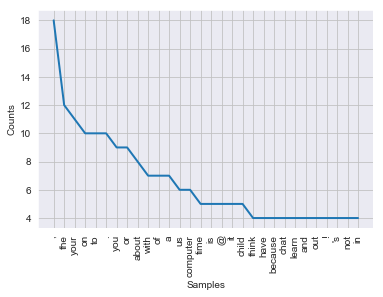

In [39]:
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

In [40]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [44]:
from nltk.tokenize import sent_tokenize

tokenized_sent=sent_tokenize(essays1.essay.iloc[0])

filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
        
# filtered_sent

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(essays1.essay, 20)

for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['essay' , 'count'])
df1.groupby('essay').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in essays before removing stop words')

to 22205
the 22200
and 18613
you 17907
computers 10646
on 10406
people 10324
that 9878
of 9780
computer 9259
is 9053
are 8666
can 8391
in 7994
they 6861
it 6855
have 6766
with 6663
for 6292
your 4937


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [48]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(essays1['essay'], 20)

for word, freq in common_words:
    print(word, freq)
    
df2 = pd.DataFrame(common_words, columns = ['essay' , 'count'])
df2.groupby('essay').sum()['count'].sort_values(ascending=False).iplot(
        kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in essays after removing stop words')

computers 10646
people 10324
computer 9259
time 4044
friends 2831
caps1 2725
family 2538
use 2532
like 2321
think 2222
help 2220
just 2078
caps2 2068
talk 1900
things 1857
good 1816
know 1803
learn 1783
don 1722
online 1721


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [49]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(essays1['essay'], 20)

for word, freq in common_words:
    print(word, freq)
    
df3 = pd.DataFrame(common_words, columns = ['essay' , 'count'])
df3.groupby('essay').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in essays before removing stop words')

the computer 5093
on the 3935
you can 3623
computers are 2332
if you 1489
of the 1424
in the 1246
talk to 1218
computers have 1189
the internet 1123
that computers 1121
the world 1035
to do 1030
to the 966
they are 957
on people 952
hand eye 921
want to 877
time on 859
it is 857


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [50]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(essays1['essay'], 20)

for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['essay' , 'count'])
df4.groupby('essay').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in essays after removing stop words')

hand eye 943
spend time 756
eye coordination 734
think computers 658
effect people 641
family friends 624
use computers 602
use computer 589
computers help 588
friends family 564
time computer 552
computers good 489
spending time 472
people use 459
computers positive 442
positive effect 436
caps1 caps2 394
far away 385
local newspaper 379
computers people 364


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [51]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(essays1['essay'], 20)

for word, freq in common_words:
    print(word, freq)
    
df5 = pd.DataFrame(common_words, columns = ['essay' , 'count'])
df5.groupby('essay').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in essays before removing stop words')

on the computer 2497
hand eye coordination 716
effect on people 560
family and friends 521
the computer is 478
time on the 466
to talk to 448
much time on 444
the computer and 435
friends and family 418
that computers are 393
on the internet 391
positive effect on 371
to learn about 352
you want to 342
dear local newspaper 328
go on the 317
with family and 305
use the computer 305
be able to 305


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [52]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(essays1['essay'], 20)

for word, freq in common_words:
    print(word, freq)
    
df6 = pd.DataFrame(common_words, columns = ['essay' , 'count'])
df6.groupby('essay').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in essays after removing stop words')

hand eye coordination 727
positive effect people 337
dear local newspaper 330
computers positive effect 298
people spend time 247
spend time computer 196
dear caps1 caps2 195
people use computers 191
teach hand eye 181
computers benefit society 177
people spending time 141
far away places 141
spending time computer 133
time family friends 127
computers help people 123
think computers good 117
spend time family 114
people ability learn 112
learn faraway places 112
local newspaper caps1 108


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
y0 = df.loc[df['Department Name'] == 'Tops']['polarity']
y1 = df.loc[df['Department Name'] == 'Dresses']['polarity']
y2 = df.loc[df['Department Name'] == 'Bottoms']['polarity']
y3 = df.loc[df['Department Name'] == 'Intimate']['polarity']
y4 = df.loc[df['Department Name'] == 'Jackets']['polarity']
y5 = df.loc[df['Department Name'] == 'Trend']['polarity']

trace0 = go.Box(
    y=y0,
    name = 'Tops',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Dresses',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bottoms',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Intimate',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Jackets',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Trend',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Department Name"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Department Name")